In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
violations_df = pd.read_json('../place_violations_table_v1.json')

In [4]:
violations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   place_id          33 non-null     object
 1   place_type        33 non-null     object
 2   total_violations  33 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 920.0+ bytes


In [5]:
violations_df.columns
violations_df

,place_id,place_type,total_violations
0,region_1,region,10432
1,district_1,district,5216
2,station_1,station,1043
3,terminal_1,terminal,1043
4,station_2,station,4173
5,terminal_2,terminal,4173
6,district_2,district,5216
7,station_3,station,3130
8,terminal_3,terminal,1408
9,terminal_4,terminal,1722


In [6]:
place_types = violations_df.place_type.unique()

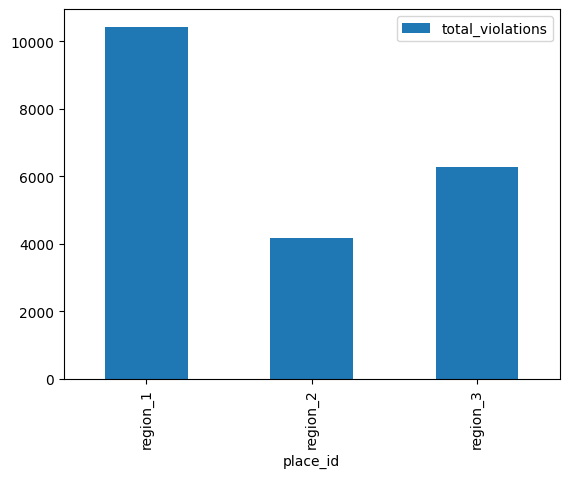

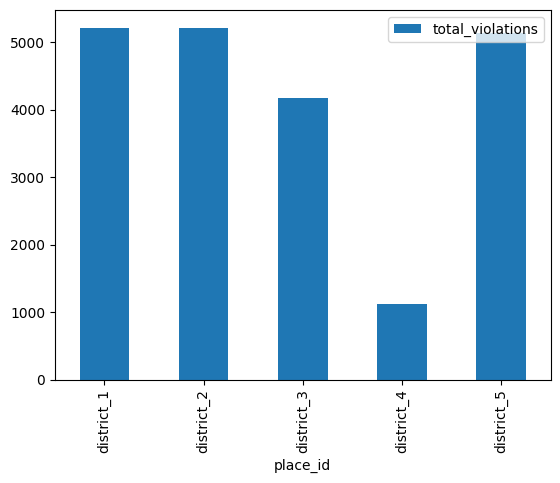

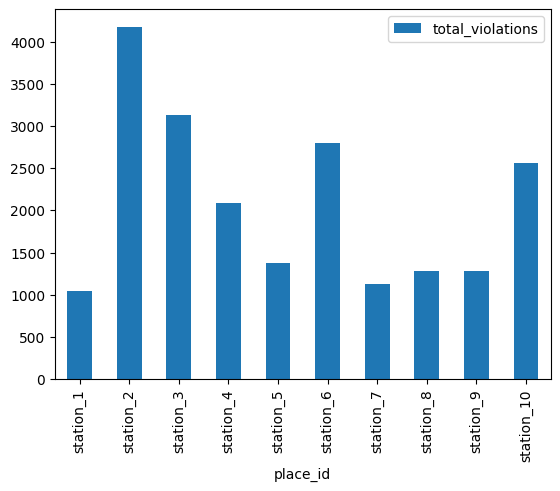

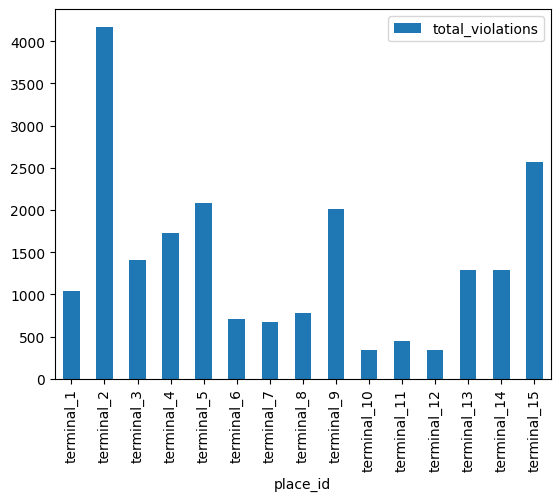

In [7]:
for place_type in place_types:
    df = violations_df[violations_df['place_type']==place_type]
    df.plot(x="place_id", y="total_violations", kind="bar")

In [8]:
places_df = pd.read_csv('../places.csv')

In [9]:
places_df.columns

Index(['place_id', 'parent_id'], dtype='object')

In [10]:
total_violations_with_parent_df = violations_df.merge(places_df[['place_id', 'parent_id']], on = 'place_id', how = 'left')

In [11]:
total_violations_with_parent_df

,place_id,place_type,total_violations,parent_id
0,region_1,region,10432,NaN
1,district_1,district,5216,region_1
2,station_1,station,1043,district_1
3,terminal_1,terminal,1043,station_1
4,station_2,station,4173,district_1
5,terminal_2,terminal,4173,station_2
6,district_2,district,5216,region_1
7,station_3,station,3130,district_2
8,terminal_3,terminal,1408,station_3
9,terminal_4,terminal,1722,station_3


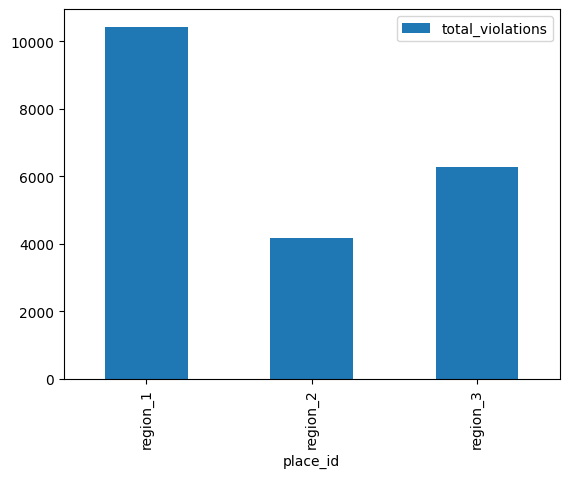

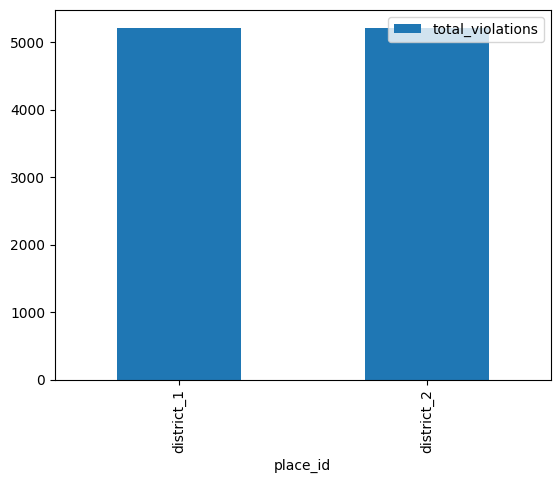

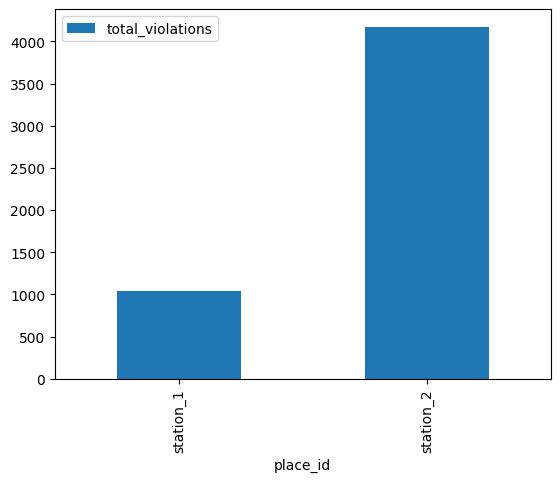

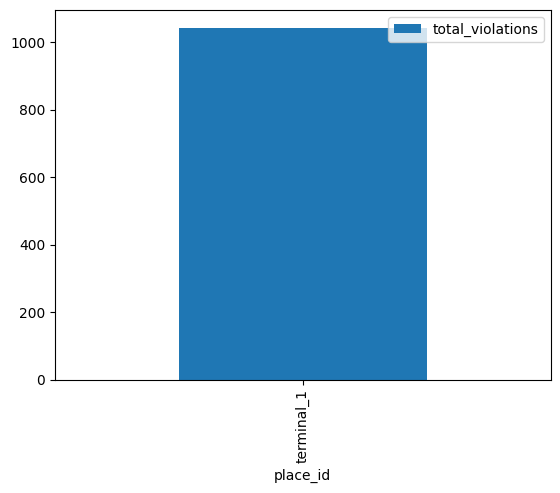

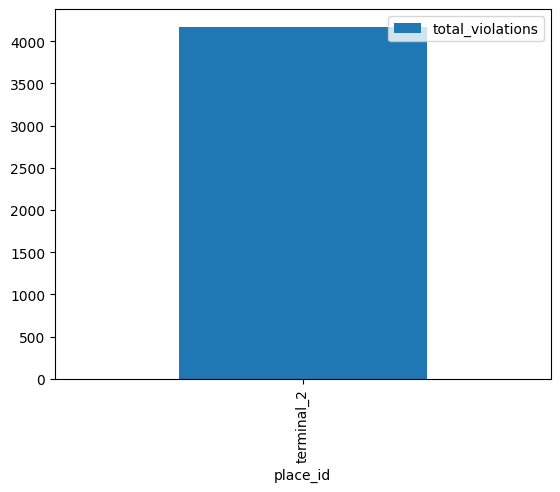

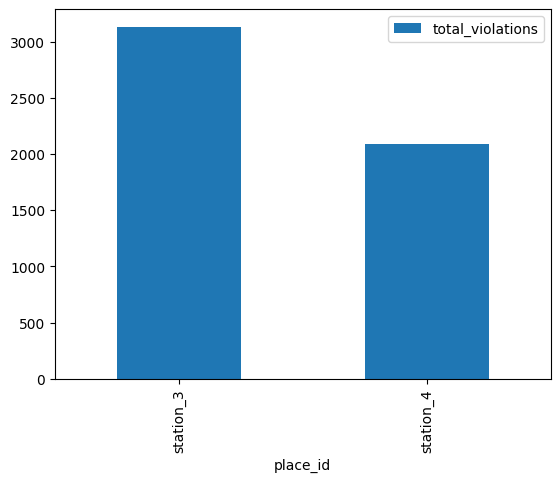

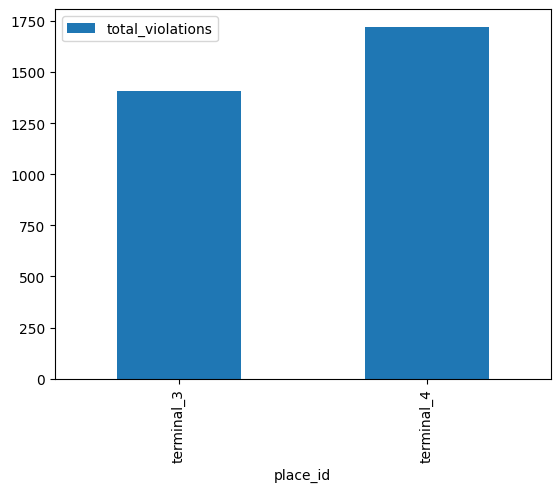

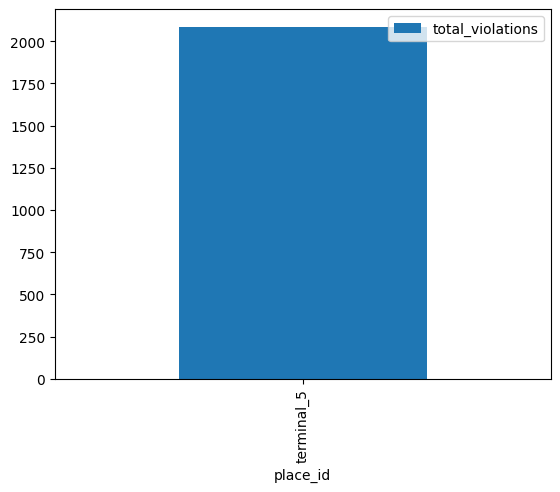

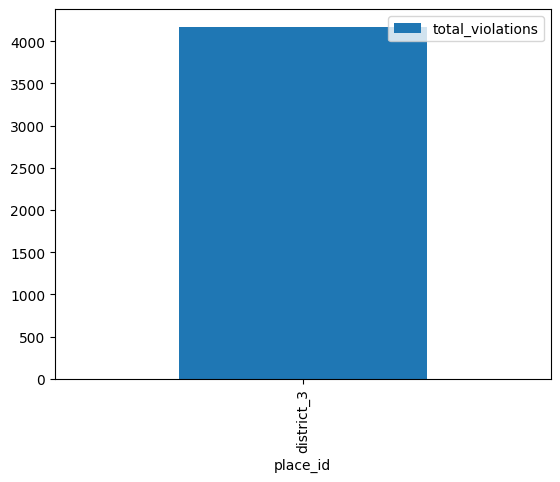

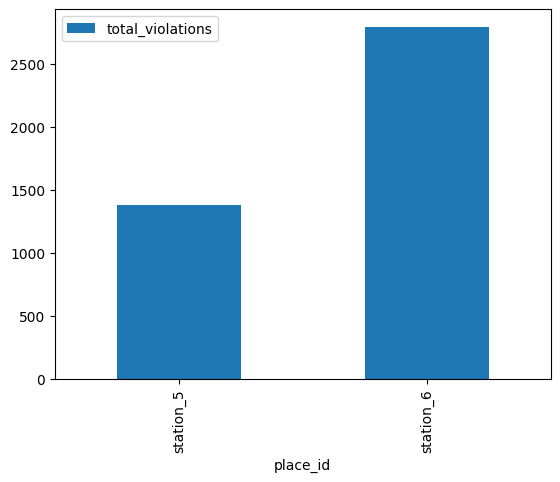

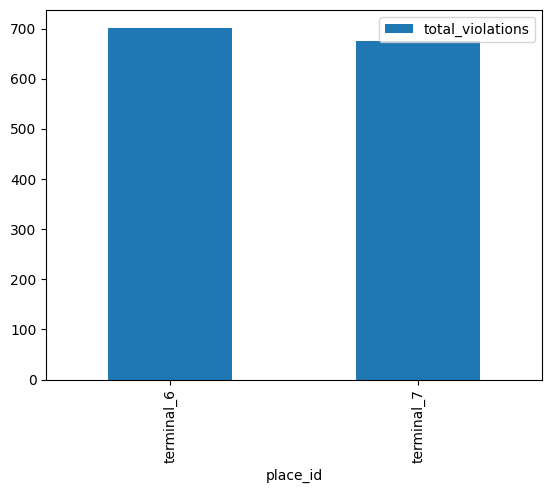

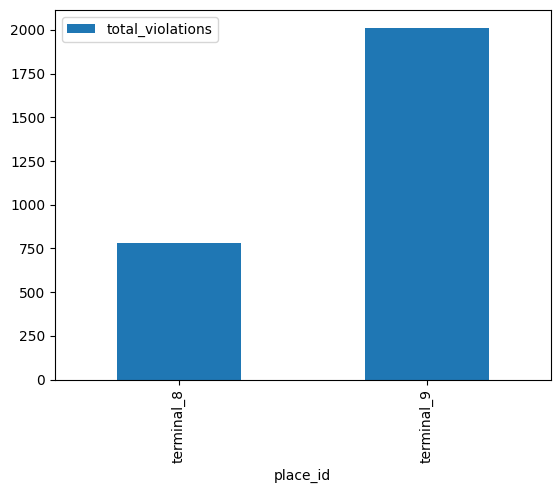

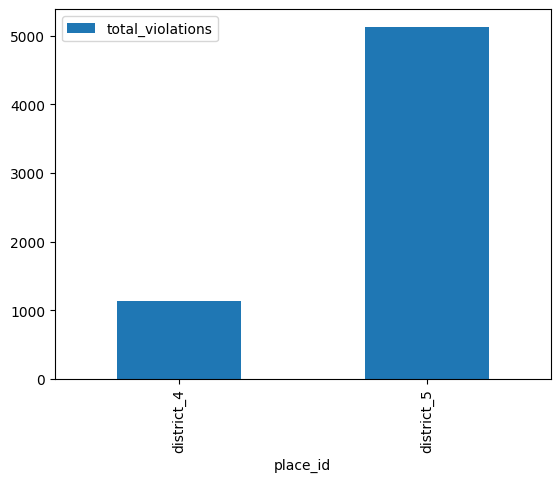

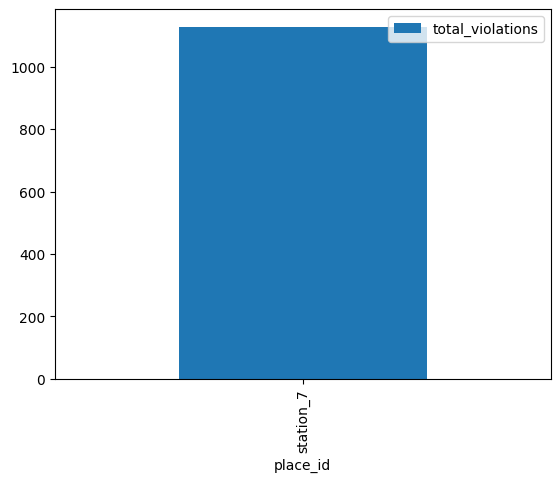

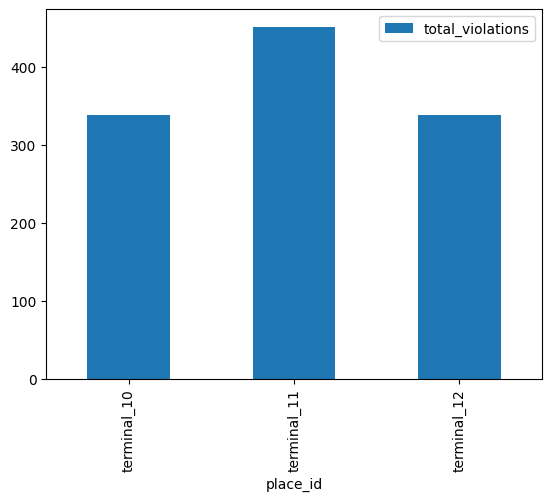

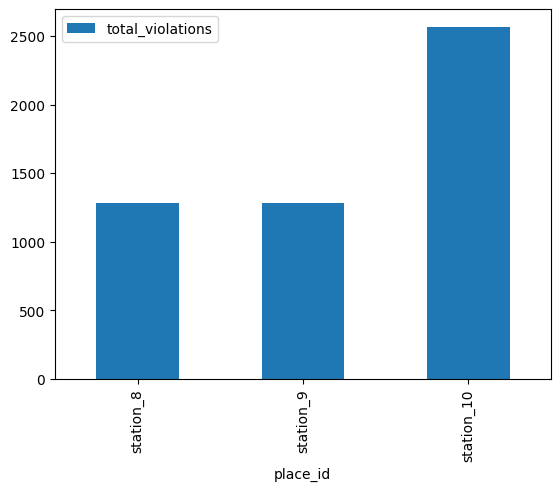

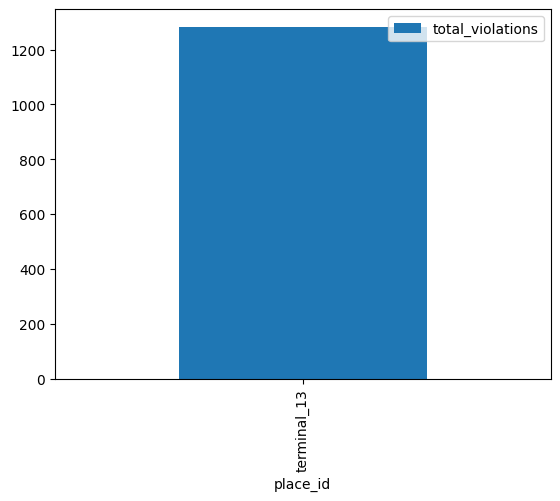

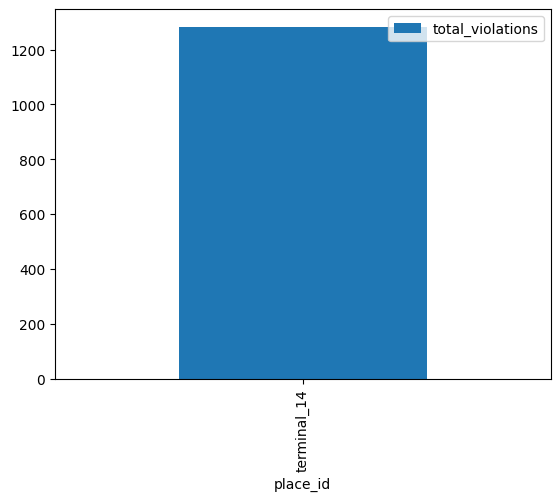

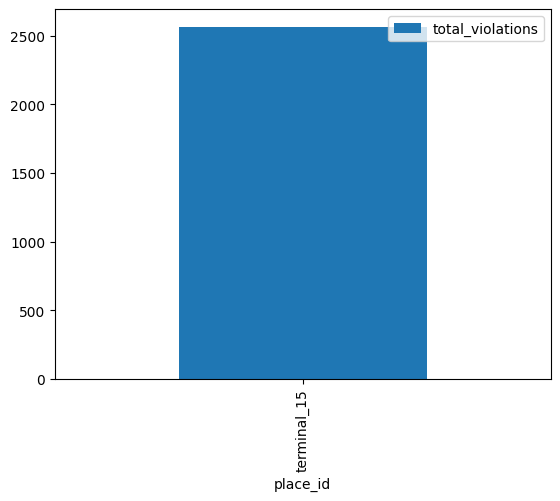

In [12]:
regions = total_violations_with_parent_df[total_violations_with_parent_df['place_type']=='region']
regions.plot(x="place_id", y="total_violations", kind="bar")
for ind in regions.index:
    region = regions['place_id'][ind]
    districts = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==region]
    districts.plot(x="place_id", y="total_violations", kind="bar")
    for ind in districts.index:
        district = districts['place_id'][ind]
        stations = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==district]
        stations.plot(x="place_id", y="total_violations", kind="bar")
        for ind in stations.index:
            station = stations['place_id'][ind]
            terminals = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==station]
            terminals.plot(x="place_id", y="total_violations", kind="bar")

In [13]:
driver_viol_df = pd.read_json("../driver_violations_table_v1.json")

In [14]:
driver_viol_df

,driver_id,total_violations
0,driver_1,1043
1,driver_2,835
2,driver_3,1669
3,driver_4,1669
4,driver_5,704
5,driver_6,282
6,driver_7,422
7,driver_8,1722
8,driver_9,2086
9,driver_10,211


<Axes: xlabel='driver_id'>

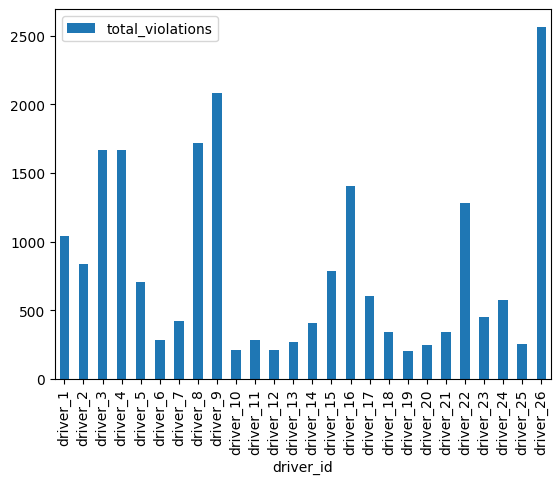

In [15]:
driver_viol_df.plot(x="driver_id", y="total_violations", kind="bar")

In [16]:
driver_viol_ranges = pd.read_json("../driver_violation_ranges_v1.json")

In [17]:
driver_viol_ranges

,driver_id,start,end,duration
0,driver_1,2020-08-21T16:23,2020-08-21T19:23,3
1,driver_1,2020-08-21T10:38,2020-08-21T12:38,2
2,driver_1,2020-08-21T01:03,2020-08-21T02:03,1
3,driver_1,2020-08-21T14:07,2020-08-21T16:07,2
4,driver_1,2020-08-21T16:23,2020-08-21T17:23,1
...,...,...,...,...
1038,driver_1,2019-09-27T20:06,2019-09-27T21:06,1
1039,driver_1,2019-09-27T01:04,2019-09-27T04:04,3
1040,driver_1,2019-09-19T00:19,2019-09-19T02:19,2
1041,driver_1,2019-09-22T00:16,2019-09-22T06:16,6


In [18]:
from datetime import datetime

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

columns = driver_viol_ranges.columns
driver_viol_ranges_copy = driver_viol_ranges.loc[:, columns]
driver_viol_ranges_copy['month']=0
driver_viol_ranges_copy['weekday']=''
driver_viol_ranges_copy['day']=0
driver_viol_ranges_copy['hours'] = ''
driver_viol_ranges_copy['dates'] = ''
for i in range(len(driver_viol_ranges_copy)):
    start = driver_viol_ranges_copy.loc[i, 'start']
    start_date = start.split('T')[0]
    start_time = datetime.strptime(start, '%Y-%m-%dT%H:%M')
    end = driver_viol_ranges_copy.loc[i, 'end']
    end_date = end.split('T')[0]
    end_time = datetime.strptime(end, '%Y-%m-%dT%H:%M')
    print("start_time: ", start_time)
    print("end_time: ", end_time)
    dts = pd.date_range(datetime.strptime(start_date, '%Y-%m-%d'), datetime.strptime(end_date, '%Y-%m-%d'),freq='d')
    print("dts: ", dts)
    dates = []
    for dt in dts:
        dates.append(dt.strftime("%Y-%m-%d"))
    if len(dates) > 1:
        print(driver_viol_ranges_copy.loc[i])
    dts = pd.date_range(start_time, end_time,freq='h')
    driver_viol_ranges_copy.at[i, 'dates'] = dates
    hours = []
    for dt in dts:
        hours.append(dt.hour)
    driver_viol_ranges_copy.at[i, 'hours'] = hours
    month = start_time.month
    day = start_time.day
    weekday = start_time.weekday()
    driver_viol_ranges_copy.loc[i, 'weekday'] = day_name[weekday]
    driver_viol_ranges_copy.loc[i, 'month'] = month
    driver_viol_ranges_copy.loc[i, 'day'] = day
    start_hour = start_time.hour
    end_hour = end_time.hour
    # hours = []
    # for hour in range(start_hour, end_hour+1):
    #     hours.append(hour)
    # driver_viol_ranges_copy.at[i, 'hours'] = hours
    # driver_viol_ranges_copy.at[i, 'hours'] = [start_hour]

start_time:  2020-08-21 16:23:00
end_time:  2020-08-21 19:23:00
dts:  DatetimeIndex(['2020-08-21'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-21 10:38:00
end_time:  2020-08-21 12:38:00
dts:  DatetimeIndex(['2020-08-21'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-21 01:03:00
end_time:  2020-08-21 02:03:00
dts:  DatetimeIndex(['2020-08-21'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-21 14:07:00
end_time:  2020-08-21 16:07:00
dts:  DatetimeIndex(['2020-08-21'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-21 16:23:00
end_time:  2020-08-21 17:23:00
dts:  DatetimeIndex(['2020-08-21'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-12 01:04:00
end_time:  2020-08-12 04:04:00
dts:  DatetimeIndex(['2020-08-12'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-12 00:07:00
end_time:  2020-08-12 02:07:00
dts:  DatetimeIndex(['2020-08-12'], dtype='datetime64[ns]', freq='D')
start_time:  2020-08-12 01:34:00
end_time:  2020-08-12 02:34:0

In [19]:
driver_viol_ranges_copy

,driver_id,start,end,duration,month,weekday,day,hours,dates
0,driver_1,2020-08-21T16:23,2020-08-21T19:23,3,8,Friday,21,"[16, 17, 18, 19]",[2020-08-21]
1,driver_1,2020-08-21T10:38,2020-08-21T12:38,2,8,Friday,21,"[10, 11, 12]",[2020-08-21]
2,driver_1,2020-08-21T01:03,2020-08-21T02:03,1,8,Friday,21,"[1, 2]",[2020-08-21]
3,driver_1,2020-08-21T14:07,2020-08-21T16:07,2,8,Friday,21,"[14, 15, 16]",[2020-08-21]
4,driver_1,2020-08-21T16:23,2020-08-21T17:23,1,8,Friday,21,"[16, 17]",[2020-08-21]
...,...,...,...,...,...,...,...,...,...
1038,driver_1,2019-09-27T20:06,2019-09-27T21:06,1,9,Friday,27,"[20, 21]",[2019-09-27]
1039,driver_1,2019-09-27T01:04,2019-09-27T04:04,3,9,Friday,27,"[1, 2, 3, 4]",[2019-09-27]
1040,driver_1,2019-09-19T00:19,2019-09-19T02:19,2,9,Thursday,19,"[0, 1, 2]",[2019-09-19]
1041,driver_1,2019-09-22T00:16,2019-09-22T06:16,6,9,Sunday,22,"[0, 1, 2, 3, 4, 5, 6]",[2019-09-22]


<Axes: xlabel='month'>

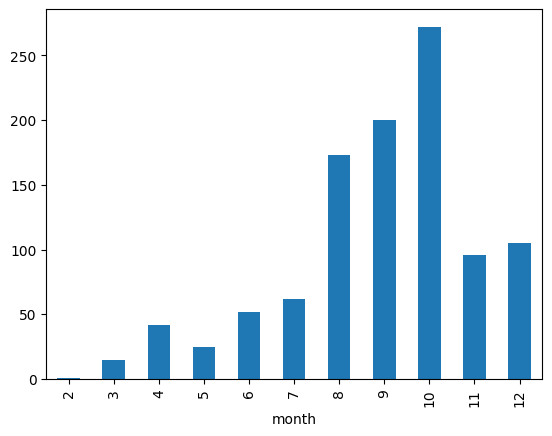

In [20]:
month_counts = driver_viol_ranges_copy.month.value_counts().sort_index()
month_counts.plot(x="month", kind='bar')

<Axes: xlabel='hours'>

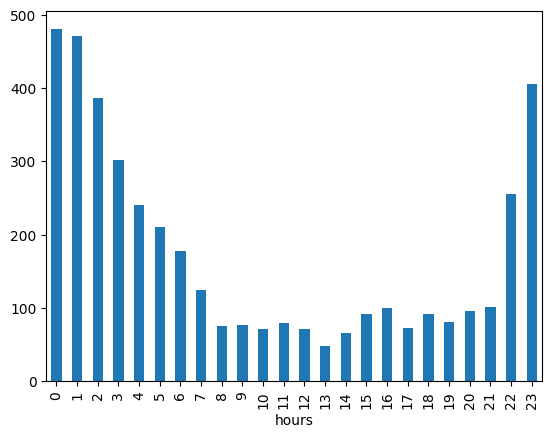

In [21]:
hour_counts = driver_viol_ranges_copy['hours'].explode().value_counts().sort_index()
hour_counts.plot(x="hour", kind='bar')

<Axes: xlabel='duration'>

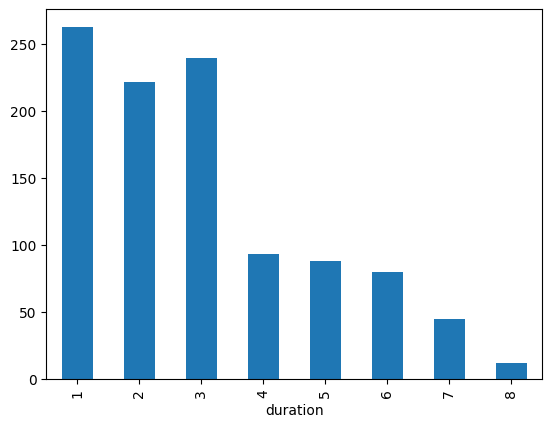

In [22]:
duration_counts = driver_viol_ranges_copy['duration'].value_counts().sort_index()
duration_counts.plot(x="duration", kind='bar')

<Axes: xlabel='day'>

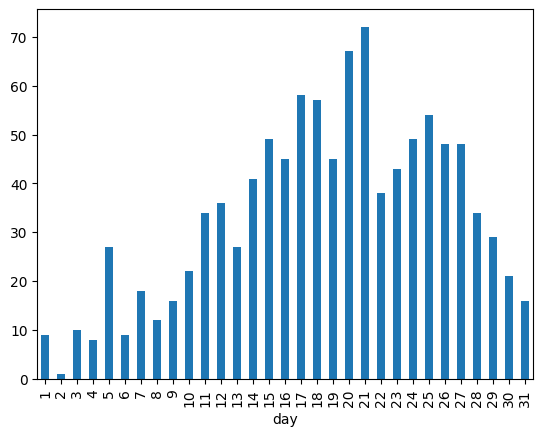

In [23]:
day_counts = driver_viol_ranges_copy['day'].value_counts().sort_index()
day_counts.plot(x="day", kind='bar')

<Axes: xlabel='weekday'>

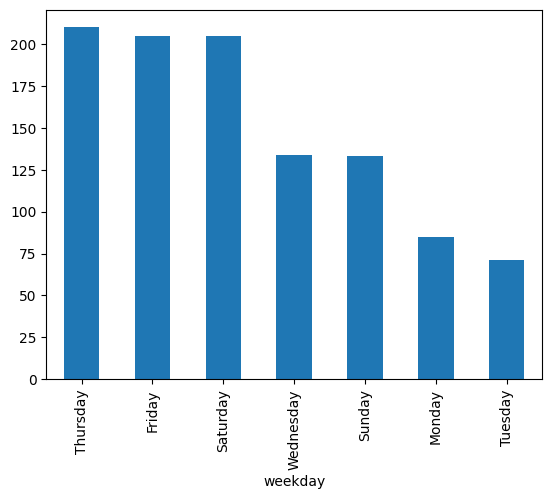

In [24]:
weekday_counts = driver_viol_ranges_copy['weekday'].value_counts()
weekday_counts.plot(x="weekday", kind='bar')

In [25]:
driver_26_viol = driver_viol_ranges_copy[driver_viol_ranges_copy['driver_id']=='driver_26']

In [26]:
driver_26_viol

,driver_id,start,end,duration,month,weekday,day,hours,dates


IndexError: index 0 is out of bounds for axis 0 with size 0

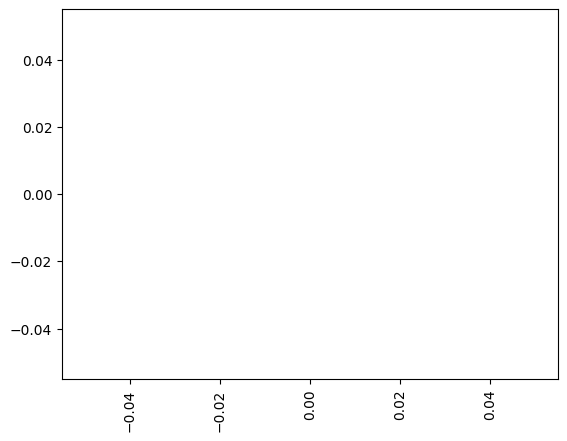

In [27]:
weekday_counts = driver_26_viol['weekday'].value_counts()
weekday_counts.plot(x="weekday", kind='bar')

<Axes: xlabel='dates'>

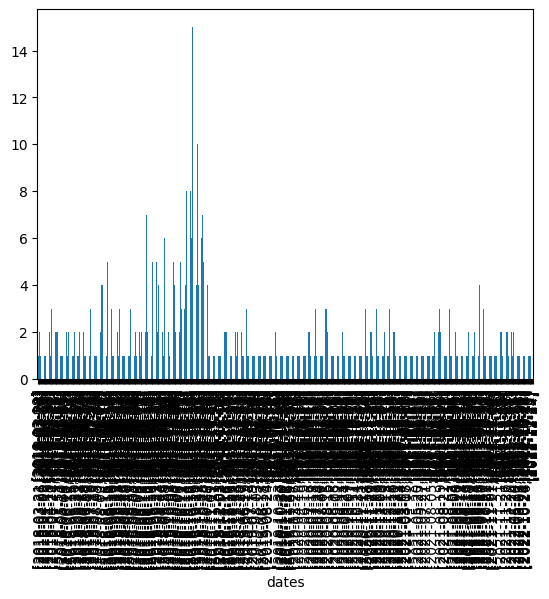

In [28]:
date_counts = driver_viol_ranges_copy['dates'].value_counts().sort_index()
date_counts.plot(kind='bar')

In [51]:
data = {'timestamp': ['2022-01-01 00:00:00', '2022-01-01 01:00:00', '2022-01-01 03:00:00', '2022-01-01 05:00:00'], 'value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Resample the time series to a frequency of 1 hour
df_resampled = df.resample('1H').mean()

In [52]:
df_resampled

,value
timestamp,
2022-01-01 00:00:00,10.0
2022-01-01 01:00:00,20.0
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,30.0
2022-01-01 04:00:00,NaN
2022-01-01 05:00:00,40.0


In [63]:
driver_viol_ranges_multiple_dates = driver_viol_ranges_copy[driver_viol_ranges_copy.dates.map(len)>1]

In [86]:
driver_viol_ranges_date_expanded = driver_viol_ranges_copy.explode('dates').reset_index()
driver_viol_ranges_date_expanded = driver_viol_ranges_date_expanded.rename(columns={'dates': 'date'})

In [87]:
driver_viol_ranges_date_expanded = driver_viol_ranges_date_expanded.drop(['start', 'end', 'duration', 'hours'], axis=1)

In [88]:
driver_viol_ranges_date_expanded

,index,driver_id,month,weekday,day,date
0,0,driver_1,7,Thursday,7,2022-07-07
1,0,driver_1,7,Thursday,7,2022-07-08
2,1,driver_1,11,Wednesday,2,2022-11-02
3,2,driver_1,4,Friday,22,2022-04-22
4,3,driver_1,2,Saturday,12,2022-02-12
...,...,...,...,...,...,...
5523,4172,driver_26,2,Sunday,27,2022-02-27
5524,4173,driver_26,11,Monday,28,2022-11-28
5525,4173,driver_26,11,Monday,28,2022-11-29
5526,4174,driver_26,12,Saturday,17,2022-12-17


In [90]:
for i in range(len(driver_viol_ranges_date_expanded)):
    date = datetime.strptime(driver_viol_ranges_date_expanded.loc[i]['date'], '%Y-%m-%d')
    month = date.month
    day = date.day
    weekday = date.weekday()
    driver_viol_ranges_date_expanded.loc[i, 'weekday'] = day_name[weekday]
    driver_viol_ranges_date_expanded.loc[i, 'month'] = month
    driver_viol_ranges_date_expanded.loc[i, 'day'] = day

In [92]:
driver_viol_ranges_date_expanded['has_violation']=1

In [93]:
driver_viol_ranges_date_expanded

,index,driver_id,month,weekday,day,date,has_violation
0,0,driver_1,7,Thursday,7,2022-07-07,1
1,0,driver_1,7,Friday,8,2022-07-08,1
2,1,driver_1,11,Wednesday,2,2022-11-02,1
3,2,driver_1,4,Friday,22,2022-04-22,1
4,3,driver_1,2,Saturday,12,2022-02-12,1
...,...,...,...,...,...,...,...
5523,4172,driver_26,2,Sunday,27,2022-02-27,1
5524,4173,driver_26,11,Monday,28,2022-11-28,1
5525,4173,driver_26,11,Tuesday,29,2022-11-29,1
5526,4174,driver_26,12,Saturday,17,2022-12-17,1


In [96]:
driver_viol_ranges_group_by_date = driver_viol_ranges_date_expanded.groupby('date')['driver_id'].agg(' '.join).reset_index()

In [109]:
driver_viol_ranges_group_by_date['driver_ids'] = driver_viol_ranges_group_by_date['driver_id'].str.split(' ')

In [111]:
driver_viol_ranges_group_by_date.drop(['driver_id'], )

,date,driver_id,driver_ids
0,2022-01-01,driver_2 driver_2 driver_3 driver_3 driver_3 d...,"[driver_2, driver_2, driver_3, driver_3, drive..."
1,2022-01-02,driver_2 driver_2 driver_3 driver_3 driver_3 d...,"[driver_2, driver_2, driver_3, driver_3, drive..."
2,2022-01-03,driver_2 driver_3 driver_8 driver_8 driver_8 d...,"[driver_2, driver_3, driver_8, driver_8, drive..."
3,2022-01-04,driver_1 driver_1 driver_4 driver_9 driver_15 ...,"[driver_1, driver_1, driver_4, driver_9, drive..."
4,2022-01-05,driver_1 driver_2 driver_4 driver_9 driver_9 d...,"[driver_1, driver_2, driver_4, driver_9, drive..."
...,...,...,...
360,2022-12-28,driver_2 driver_3 driver_4 driver_4 driver_6 d...,"[driver_2, driver_3, driver_4, driver_4, drive..."
361,2022-12-29,driver_1 driver_1 driver_3 driver_3 driver_4 d...,"[driver_1, driver_1, driver_3, driver_3, drive..."
362,2022-12-30,driver_1 driver_1 driver_2 driver_2 driver_3 d...,"[driver_1, driver_1, driver_2, driver_2, drive..."
363,2022-12-31,driver_2 driver_2 driver_2 driver_3 driver_7 d...,"[driver_2, driver_2, driver_2, driver_3, drive..."
